# WDL 2023 
## 🎯 Challenge: Understanding Mobility in Lisbon

The Lisbon City Council and World Data League have teamed up for this year's league to tackle the issue of mass migration of people out of the city of Lisbon into the metropolitan area. The city remains a central hub but the traffic and congestion levels due to people traveling into the city via the main entry and exit points has contributed to an array of issues, including polution, congestion and lower quality of life.

### Problem Statement: Using mobile terminal data collected between Sep-Dec 2021, extract the inputs that will allow planning and carrying out the necessary actions to improve mobility in the city and the quality of life of its citizens and meet sustainability goals.

### Team: Team K-MENA

### 👥 Authors: Sara Sabzikari, Mine Yasemin 

## Part 1: Introduction 

Our team aims to help the strategic planning towards a city with "Smooth Traffic Flow". We developed a deep learning based forecasting model to help frame mobility policies for the city of Lisbon. This is produced by predicting futures trends on mobility flow at particular areas in the city and clustering these areas by impact levels.

We have produced a model and product plan that can help users themselves identify inefficient routes and when to consider alternative routes/modes of transport. Stakeholders need reliable insights to inform policy, and people in Lisbon need alternatives.

The two main datasets of use were two mobile traffic datasets locating and quantifying mobile terminals as a proxy for traffic within Lisbons road network.

## Part 2: Exploratory Visualisation

In [9]:
# import the libraries needed for part 2
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
from datetime import datetime

In [10]:
# Read in the data
df = pd.read_csv('/Users/sarasabzikari/Documents/Data Assignments /WDL/ficheiros_WDL/DISPOSITIVOS MOVEIS_GRELHA E EIXOS/CML_DISPOSITIVOS MOVEIS_EIXOS_all.csv')


In [11]:
# renaming columns
df.rename(columns={'C12':'no_entrance_main_roads','C13':'no_exits_main_roads'}, inplace=True)
df.head()

Eixo                  Datetime  extract_year_2  extract_month_3  \
0  Ponte 25 Abril  2022-08-31T23:00:00.000Z            2022                8   
1            IC16  2022-08-31T23:00:00.000Z            2022                8   
2        Marginal  2022-08-31T23:00:00.000Z            2022                8   
3            IC19  2022-08-31T23:00:00.000Z            2022                8   
4              A1  2022-08-31T23:00:00.000Z            2022                8   

   extract_day_4  no_entrance_main_roads  no_exits_main_roads  
0             31               52.919998            36.459999  
1             31               80.900002            89.019997  
2             31               51.470001            41.220001  
3             31              200.970001           221.169998  
4             31              102.760002            78.669998

In [12]:
# Extracting from datetime to separate columns 
entry_exit = df.copy()
entry_exit['time'] = pd.to_datetime(entry_exit['Datetime']).dt.time
entry_exit['date'] = pd.to_datetime(entry_exit['Datetime']).dt.date
entry_exit['hour'] = pd.to_datetime(entry_exit['Datetime']).dt.hour

# converting the date to week day in separate column
day_of_week = []

for row in entry_exit['date']:
    day = datetime.strftime(row,'%A')
    day_of_week.append(day)
       
entry_exit['day_of_week'] = day_of_week

# Sort values in order of street and datetime
entry_exit.sort_values(['Eixo','Datetime'], inplace=True)
entry_exit.head()

Eixo                  Datetime  extract_year_2  extract_month_3  \
4    A1  2022-08-31T23:00:00.000Z            2022                8   
19   A1  2022-08-31T23:05:00.000Z            2022                8   
25   A1  2022-08-31T23:10:00.000Z            2022                8   
40   A1  2022-08-31T23:15:00.000Z            2022                8   
49   A1  2022-08-31T23:20:00.000Z            2022                8   

    extract_day_4  no_entrance_main_roads  no_exits_main_roads      time  \
4              31              102.760002            78.669998  23:00:00   
19             31               80.790001            38.349998  23:05:00   
25             31               55.480000            57.980000  23:10:00   
40             31               40.639999            54.400002  23:15:00   
49             31               88.269997           107.610001  23:20:00   

          date  hour day_of_week  
4   2022-08-31    23   Wednesday  
19  2022-08-31    23   Wednesday  
25  2022-08-31    23   Wednesday  
40  2022-08-31    23   Wednesday  
49  2022-08-31    23   Wednesday

In [14]:
# Creating new df to plot data - can define level of granularity for summing via of groupby

day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

# grouping data by the main road (Eixo), day of week and hour
hourly_data = entry_exit.groupby(['Eixo','day_of_week','hour']).sum()
hourly_data.reset_index(inplace=True)
hourly_data.day_of_week = hourly_data.day_of_week.astype("category")
hourly_data.day_of_week = hourly_data.day_of_week.cat.set_categories(day_order)
hourly_data.sort_values(['day_of_week'])
hourly_data.head()

Eixo day_of_week  hour  extract_year_2  extract_month_3  extract_day_4  \
0   A1      Friday     0          303300             1488           2370   
1   A1      Friday     1          291168             1428           2244   
2   A1      Friday     2          291168             1428           2244   
3   A1      Friday     3          291168             1428           2244   
4   A1      Friday     4          291168             1428           2244   

   no_entrance_main_roads  no_exits_main_roads  
0             9078.250001         10516.939923  
1            10989.300003         11407.980045  
2            10936.589977         11152.919968  
3            10318.090047         10200.870030  
4            11399.580017         10608.790045

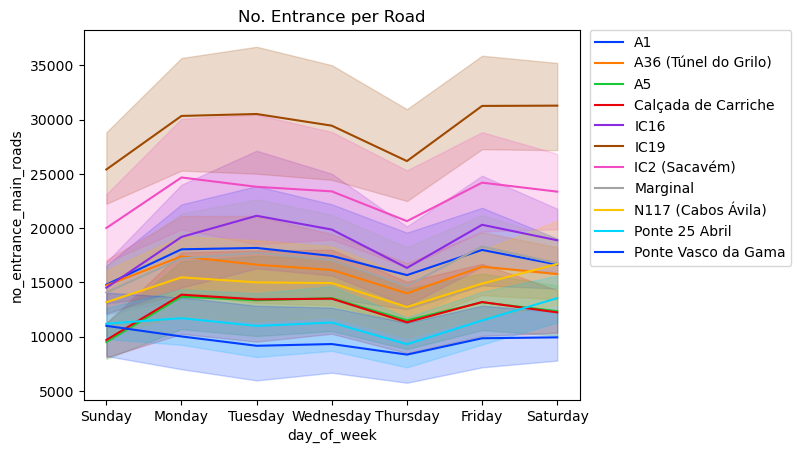

In [16]:
# plotting the average entries per day across the 3 month period

sns.lineplot(hourly_data,x='day_of_week',y='no_entrance_main_roads',
             hue='Eixo',palette='bright').set(title='No. Entrance per Road')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

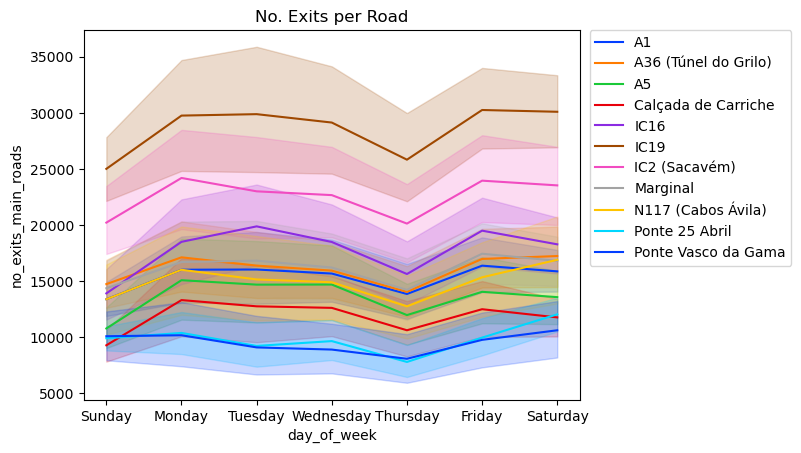

In [17]:
# plotting the average exits per day across the 3 month period

sns.lineplot(hourly_data,x='day_of_week',y='no_exits_main_roads',
             hue='Eixo',palette='bright').set(title='No. Exits per Road')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


We can see that the least busiest days are Sunday and Thursday across both entries and exits, and the busiest road are the ICs.

In [19]:
# Re-pivoting the table of daily x hourly data to just include total traffic per hour per road
hourly_data2 = pd.pivot_table(hourly_data, index=['Eixo','hour'],
                              values=['no_entrance_main_roads','no_exits_main_roads'],
                              aggfunc='sum')
hourly_data2 = hourly_data2.reset_index()
hourly_data2.head()

Eixo  hour  no_entrance_main_roads  no_exits_main_roads
0   A1     0            68617.669985         79330.610028
1   A1     1            63419.260021         65770.820080
2   A1     2            63014.519977         62939.390113
3   A1     3            63921.410065         60342.890031
4   A1     4            75385.280200         71047.330161

In [21]:
# creating matrix for entry and exit data
entry_matrix = hourly_data2.pivot(index='Eixo', columns='hour', 
                           values=['no_entrance_main_roads'])

exit_matrix = hourly_data2.pivot(index='Eixo', columns='hour', 
                           values=['no_exits_main_roads'])

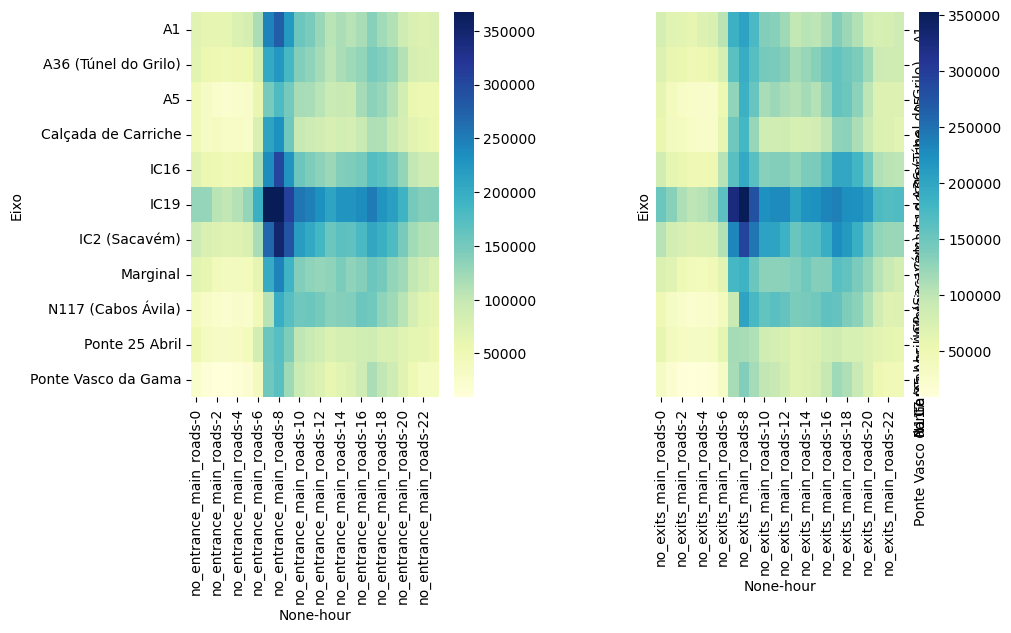

In [22]:
# plotting the hourly sum of mobile terminals across different roads and time periods (0=12am, 23=11pm)
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))

sns.heatmap(entry_matrix,ax=ax1,cmap='YlGnBu')
sns.heatmap(exit_matrix,ax=ax2,cmap='YlGnBu')

ax2.yaxis.tick_right()

fig.subplots_adjust(wspace=0.5)

#### The busiest times for both exits and entry, consistent across all roads, occur within 7-10am - the times when most are likely to commute into the city for work.

In [27]:
# filter out data per road, resample data to 1 hour frequency
hourly_data = entry_exit[entry_exit['Eixo']=='A1'].groupby(['Eixo','Datetime','date','day_of_week','hour']).sum()
hourly_data.reset_index(inplace=True)

hourly_data.Datetime = pd.to_datetime(hourly_data.Datetime)
hourly_index = hourly_data.set_index(hourly_data.Datetime)
hourly_index.resample('1H').sum()

hour  extract_year_2  extract_month_3  \
Datetime                                                           
2022-08-31 23:00:00+00:00   276           24264               96   
2022-09-01 00:00:00+00:00     0           24264              108   
2022-09-01 01:00:00+00:00    12           24264              108   
2022-09-01 02:00:00+00:00    24           24264              108   
2022-09-01 03:00:00+00:00    36           24264              108   
...                         ...             ...              ...   
2022-11-30 20:00:00+00:00   240           24264              132   
2022-11-30 21:00:00+00:00   252           24264              132   
2022-11-30 22:00:00+00:00   264           24264              132   
2022-11-30 23:00:00+00:00   276           24264              132   
2022-12-01 00:00:00+00:00     0            2022               12   

                           extract_day_4  no_entrance_main_roads  \
Datetime                                                           
2022-08-31 23:00:00+00:00            372              828.260002   
2022-09-01 00:00:00+00:00             12              846.200001   
2022-09-01 01:00:00+00:00             12              400.159997   
2022-09-01 02:00:00+00:00             12              530.799997   
2022-09-01 03:00:00+00:00             12              366.730000   
...                                  ...                     ...   
2022-11-30 20:00:00+00:00            360              851.769999   
2022-11-30 21:00:00+00:00            360              327.829999   
2022-11-30 22:00:00+00:00            360              148.490003   
2022-11-30 23:00:00+00:00            360              837.660002   
2022-12-01 00:00:00+00:00              1              582.349976   

                           no_exits_main_roads  
Datetime                                        
2022-08-31 23:00:00+00:00           838.849998  
2022-09-01 00:00:00+00:00           939.300007  
2022-09-01 01:00:00+00:00           427.390001  
2022-09-01 02:00:00+00:00           487.780001  
2022-09-01 03:00:00+00:00           288.400000  
...                                        ...  
2022-11-30 20:00:00+00:00           701.369997  
2022-11-30 21:00:00+00:00           441.540004  
2022-11-30 22:00:00+00:00           152.960000  
2022-11-30 23:00:00+00:00          1180.180000  
2022-12-01 00:00:00+00:00           541.549988  

[2186 rows x 6 columns]

(array([19236.  , 19236.25, 19236.5 , 19236.75, 19237.  , 19237.25,
        19237.5 , 19237.75, 19238.  , 19238.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

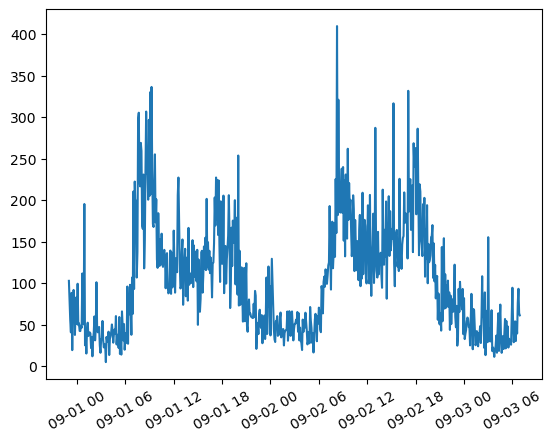

In [29]:
# can see the distinct seasonality here (across two weeks)
plt.plot(hourly_index['no_entrance_main_roads'][:672])
plt.xticks(rotation=30) 

#### In the future, we would consider using SARIMA to model the data, as there is clear seasonality between each week.

## Part 3: Interactive Density Map 


We have another dataset that we're going to build an interactive density map off of. This dataset includes mobile terminal data for every 200m x 200m square within the city of Lisbon, at 15 minute intervals.

In [2]:
# import the libraries needed for part 3
import os
from datetime import datetime
import re
import folium
from folium.plugins import MarkerCluster
import osmnx as ox
import warnings

warnings.filterwarnings(action='once')


In [8]:
centroids = pd.read_excel('ficheiros_WDL/DISPOSITIVOS MOVEIS_QUADRICULAS/DISPOSITIVOS MOVEIS_QUADRICULAS.xlsx')
centroids = gpd.GeoDataFrame(centroids, geometry=gpd.points_from_xy(centroids.longitude, centroids.latitude, crs=32629))


In [11]:
# Merging the mobile traffic data with centroid data with Grid_ID and grelha_id
def merge_mobile_centroid(mobile_dev_df, centroids_df):
    df = mobile_dev_df.merge(centroids_df,left_on='Grid_ID',right_on='grelha_id',how='left')
    df.drop(["grelha_id"], inplace=True, axis='columns')
    return df

mobile_dev_09 = pd.read_csv('ficheiros_WDL/DISPOSITIVOS MOVEIS_GRELHA E EIXOS/CML_DISPOSITIVOS MOVEIS_GRELHA_indCD15m_2022_09_0001_4000.csv')
mobile_dev_10 = pd.read_csv('ficheiros_WDL/DISPOSITIVOS MOVEIS_GRELHA E EIXOS/CML_DISPOSITIVOS MOVEIS_GRELHA_indCD15m_2022_10_0001_4000.csv')
mobile_dev_11 = pd.read_csv('ficheiros_WDL/DISPOSITIVOS MOVEIS_GRELHA E EIXOS/CML_DISPOSITIVOS MOVEIS_GRELHA_indCD15m_2022_11_0001_4000.csv')


In [ ]:
merged_df1 = merge_mobile_centroid(mobile_dev_09, centroids)
merged_df2 = merge_mobile_centroid(mobile_dev_10, centroids)
merged_df3 = merge_mobile_centroid(mobile_dev_11, centroids)
merged_mobile_df = pd.concat([merged_df1, merged_df2, merged_df3], keys=["Sep", "Oct", "Nov"])

# To understand what the most popular time of day is for each area (grid) in the city.
# What is the most crowded time people go to that grid?
merged_mobile_df['Datetime'] = pd.to_datetime(merged_mobile_df['Datetime'], format="%Y-%m-%dT%H:%M:%S.%f", errors = 'coerce')
merged_mobile_df['Time'] = pd.to_datetime(merged_mobile_df['Datetime']).dt.time
merged_mobile_df['Date'] = pd.to_datetime(merged_mobile_df['Datetime']).dt.date
merged_mobile_df = merged_mobile_df.sort_values(['Grid_ID','Datetime'])


In [5]:
dfmean = merged_mobile_df.groupby(['Grid_ID','Date']) \
       .agg({'C1':'mean'}) \
       .rename(columns={'C1':'mean_C1'}) \
       .reset_index()
dfmean.mean_C1.describe()

count    336870.000000
mean        169.549510
std         215.457654
min           0.000000
25%          39.769059
50%          95.645000
75%         211.053020
max        6704.677786
Name: mean_C1, dtype: float64

We will remove those records that are less than the average number of devices.

In [6]:
df_over_mean = pd.DataFrame()
df_over_mean = dfmean[dfmean['mean_C1'] > dfmean.mean_C1.mean()]

df_over_mean = merge_mobile_centroid(df_over_mean, centroids)
mobile_df = gpd.GeoDataFrame(
    df_over_mean, geometry=gpd.points_from_xy(df_over_mean.longitude, df_over_mean.latitude, crs=32629)
)

In [7]:
# Convert the 'Date' column of the mobile_df DataFrame to strings
dates_str = [str(x) for x in mobile_df['Date']] 

# Find the indices of dates that match the target date '2022-09-24'
idx = [i for i, e in enumerate(dates_str) if e == '2022-09-24']
data_daily = mobile_df.iloc[idx]

# Perform a spatial join between data_daily and centroids
day_df = gpd.sjoin(data_daily, centroids)
day_df.drop(["Date"], inplace=True, axis='columns')


In [28]:
# The code creates a Folium map object and sets its parameters, including the map's width, initial location, tile style, zoom level, and canvas preference. 
map = folium.Map(width='92%',  location=[38.75, -9.15], tiles="Stamen Toner", 
zoom_start=12, prefer_canvas=True)         
title_html = '''
        <h5 align="center"; margin-bottom=0px; padding-bottom=0px; style="font-size:20px"><b>Most visited places (grids) in Lisbon</b></h3>
        <h5 align="center"; margin-top=0px; padding-top=0px; style="font-size:14px">Click on the blue circles for more info</h3>
              '''
map.get_root().html.add_child(folium.Element(title_html))

In [29]:
# Create a marker for each grid record in 3 months. Format popup

marker_cluster = MarkerCluster().add_to(map)
for index, row in day_df.iterrows():
    html = f"""<strong>Grid No:</strong> {row['Grid_ID']}<br>
        <br>
        <strong>Number of visitors:</strong> {row['mean_C1']}<br>
        <br>
        <strong>freguesia:</strong> {row['freguesia_left']}<br>
        <br>
        <strong>latitude:</strong> {row['latitude_left']}<br> 
        <br>
        <strong>longitude:</strong> {row['longitude_left']}<br>
            """
    iframe = folium.IFrame(html,
                       width=200,
                       height=200)
    popup = folium.Popup(iframe,
                     max_width=400)

    folium.CircleMarker(location=[row["latitude_left"], row["longitude_left"]],
                                         radius=10,
                                         color="#3186cc",
                                         fill=True, 
                                         fill_color="#3186cc",  
                                      popup=popup).add_to(marker_cluster)
map.save("index.html")

With the interactive map here, it’s possible to get a quick overview of which grids are most visited. Plotting each grid as an individual marker would make the map hard to read. So, we first removed those records that are less than the average number of devices. And here the orange areas shows more density meaning that there are more grids with number of devices more than average. When we zoom in, we can click on the blue circles showing each grid information.

In [30]:
map

## Part 4: Mobile devices and traffic data

We can use the traffic dataset to label each timeframe of the mobile phones dataset for classification. First let's merge the traffic and mobile devices dataset using spatial coordinates. 

In [3]:
from shapely.geometry import Point, Polygon, MultiLineString, LineString
import glob
from matplotlib import cm
from matplotlib.colors import LightSource
from scipy.stats import pearsonr


In [4]:
# import dataframes and concatenate into one dataframe
traffic_09 = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "ficheiros_WDL/Waze_QUEBRA DE SERIE/Set2022/CML_waze_jams*.csv"))))
traffic_10 = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "ficheiros_WDL/Waze_QUEBRA DE SERIE/Out2022/CML_waze_jams*.csv"))))
traffic_11 = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "ficheiros_WDL/Waze_QUEBRA DE SERIE/Nov2022/CML_waze_jams*.csv"))))

dfTraffic = pd.concat([traffic_09, traffic_10, traffic_11], keys=["Sep", "Oct", "Nov"])


In [5]:
def get_coords(test_list):
    # extracts coordinates from a given input list using regular expressions
    # creates a LineString object from the extracted coordinates.
    coords = re.findall(r"[-+]?(?:\d*\.*\d+)", str(test_list))
    result_set = [float(ele) for ele in coords]
    result_set = np.reshape(coords, (-1,2))
    return LineString(result_set)

# structure and transform fields into appropriate format for GeoDataFrame
dfTraffic['geometry'] = dfTraffic['position'].apply(get_coords)
dfTraffic.drop("position", inplace=True, axis='columns')
dfTraffic['entity_ts'] = pd.to_datetime(dfTraffic['entity_ts'], format="%Y-%m-%dT%H:%M:%S", errors = 'coerce')
dfTraffic['Datetime'] = dfTraffic['entity_ts'].dt.round('15min')
dfTraffic.drop("entity_ts", inplace=True, axis='columns')
traffic_df = gpd.GeoDataFrame(dfTraffic, crs=32629)

In [9]:
# Perform a nearest neighbor spatial join between the 'traffic_df' GeoDataFrame and the 'centroids' GeoDataFrame
traffic =  traffic_df.sjoin_nearest(centroids, how="right", distance_col="Distances")

# Aggregate the 'level' column using the 'max' function to find the maximum value for each grid ID and timeframe
traffic_max = traffic.groupby(['grelha_id','Datetime']) \
       .agg({'level':'max'}) \
       .rename(columns={'level':'level_max'}) \
       .reset_index()

In [12]:
# Create a large dataset across all three months
mobile_dev_df = pd.concat([mobile_dev_09, mobile_dev_10, mobile_dev_11], keys=["Sep", "Oct", "Nov"])

mobile_dev_df['Datetime'] = pd.to_datetime(mobile_dev_df['Datetime'], format="%Y-%m-%dT%H:%M:%S", errors = 'coerce')
mobile_dev_df = mobile_dev_df.sort_values(['Grid_ID','Datetime'])


In [14]:
# joining both traffic datasets and mobile terminals dataset on grid id and datetime
dfmerged = mobile_dev_df.merge(traffic_max, left_on=['Grid_ID','Datetime'], right_on=['grelha_id','Datetime'], how='left')
dfmerged = dfmerged.drop(columns=['grelha_id'])
dfmerged['Time'] = pd.to_datetime(dfmerged['Datetime']).dt.time
dfmerged['Date'] = pd.to_datetime(dfmerged['Datetime']).dt.date
dfmerged.drop("Datetime", inplace=True, axis='columns')
dfmerged = dfmerged.sort_values(['Grid_ID', 'Date', 'Time'])
dfmerged

Grid_ID     C1   C2    C3   C4     C5    C6   C7   C8  level_max  \
0               1   0.00  0.0  0.00  0.0   0.00  0.00  0.0  0.0        NaN   
1               1   0.00  0.0  0.00  0.0   0.00  0.00  0.0  0.0        NaN   
2               1   6.66  0.0  0.00  0.0   6.66  5.13  0.0  0.0        NaN   
3               1   0.00  0.0  0.00  0.0   0.00  0.00  0.0  0.0        NaN   
4               1   0.00  0.0  0.00  0.0   0.00  0.00  0.0  0.0        NaN   
...           ...    ...  ...   ...  ...    ...   ...  ...  ...        ...   
30881252     3743   0.00  0.0  0.00  0.0   0.00  0.00  0.0  0.0        NaN   
30881253     3743   0.00  0.0  0.00  0.0   0.00  0.00  0.0  0.0        NaN   
30881254     3743   0.00  0.0  0.00  0.0   0.00  0.00  0.0  0.0        NaN   
30881255     3743   0.00  0.0  0.00  0.0   0.00  0.00  0.0  0.0        NaN   
30881256     3743  12.12  0.0  3.25  0.0  12.12  9.00  0.0  0.0        NaN   

              Time        Date  
0         00:00:00  2022-09-01  
1         00:15:00  2022-09-01  
2         00:30:00  2022-09-01  
3         00:45:00  2022-09-01  
4         01:00:00  2022-09-01  
...            ...         ...  
30881252  22:45:00  2022-11-30  
30881253  23:00:00  2022-11-30  
30881254  23:15:00  2022-11-30  
30881255  23:30:00  2022-11-30  
30881256  23:45:00  2022-11-30  

[30881257 rows x 12 columns]

We print the most crowded point by grid number and time. 

In [15]:
mx_id = dfmerged['C1'].idxmax()
pos=centroids[centroids['grelha_id']== dfmerged['Grid_ID'][mx_id]]['geometry']
grid_no = dfmerged['Grid_ID'][mx_id]
grid_no, dfmerged['C1'][mx_id], dfmerged['Date'][mx_id], dfmerged['Time'][mx_id], pos

(440,
 313284.09375,
 datetime.date(2022, 9, 15),
 datetime.time(22, 45),
 439    POINT (-9.175 38.709)
 Name: geometry, dtype: geometry)

We transformed the dataset into 4D matrix data, with dimensions of time, date, grid ID and number of mobile phones.

In [16]:
data4dim = (dfmerged.set_index(['Grid_ID', 'Date', 'Time'])
        .unstack(level=-1)
        .to_numpy()
        .reshape((dfmerged['Grid_ID'].unique().size, dfmerged['Date'].unique().size, -1, dfmerged['Time'].unique().size )) )
data4dim[np.isnan(data4dim)] = 0 

data4dim.shape

(3743, 90, 9, 96)

In [27]:
totalusersdata = data4dim[:,:,0,:] # grid x day x number of users x time
trafficdata = data4dim[:,:,8,:] #traffic level column
totalusersroamingdata = data4dim[:,:,3,:] # The total number of active mobile phones in roaming
totalusersdata.shape, trafficdata.shape, totalusersroamingdata.shape

((3743, 90, 96), (3743, 90, 96), (3743, 90, 96))

In [31]:
# grid x day x time  (3743, 90, 96)
# get average time points each day for easier visualisation of trends - reduces the dimensionality of the data

z1 =  totalusersdata.mean(axis=2).transpose()
z2 =  totalusersroamingdata.mean(axis=2).transpose()
z3 =  (totalusersdata-totalusersroamingdata).mean(axis=2).transpose()
z4 =  trafficdata.mean(axis=2).transpose()

ls = LightSource(315, 30)
rgb = ls.shade(z1, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')

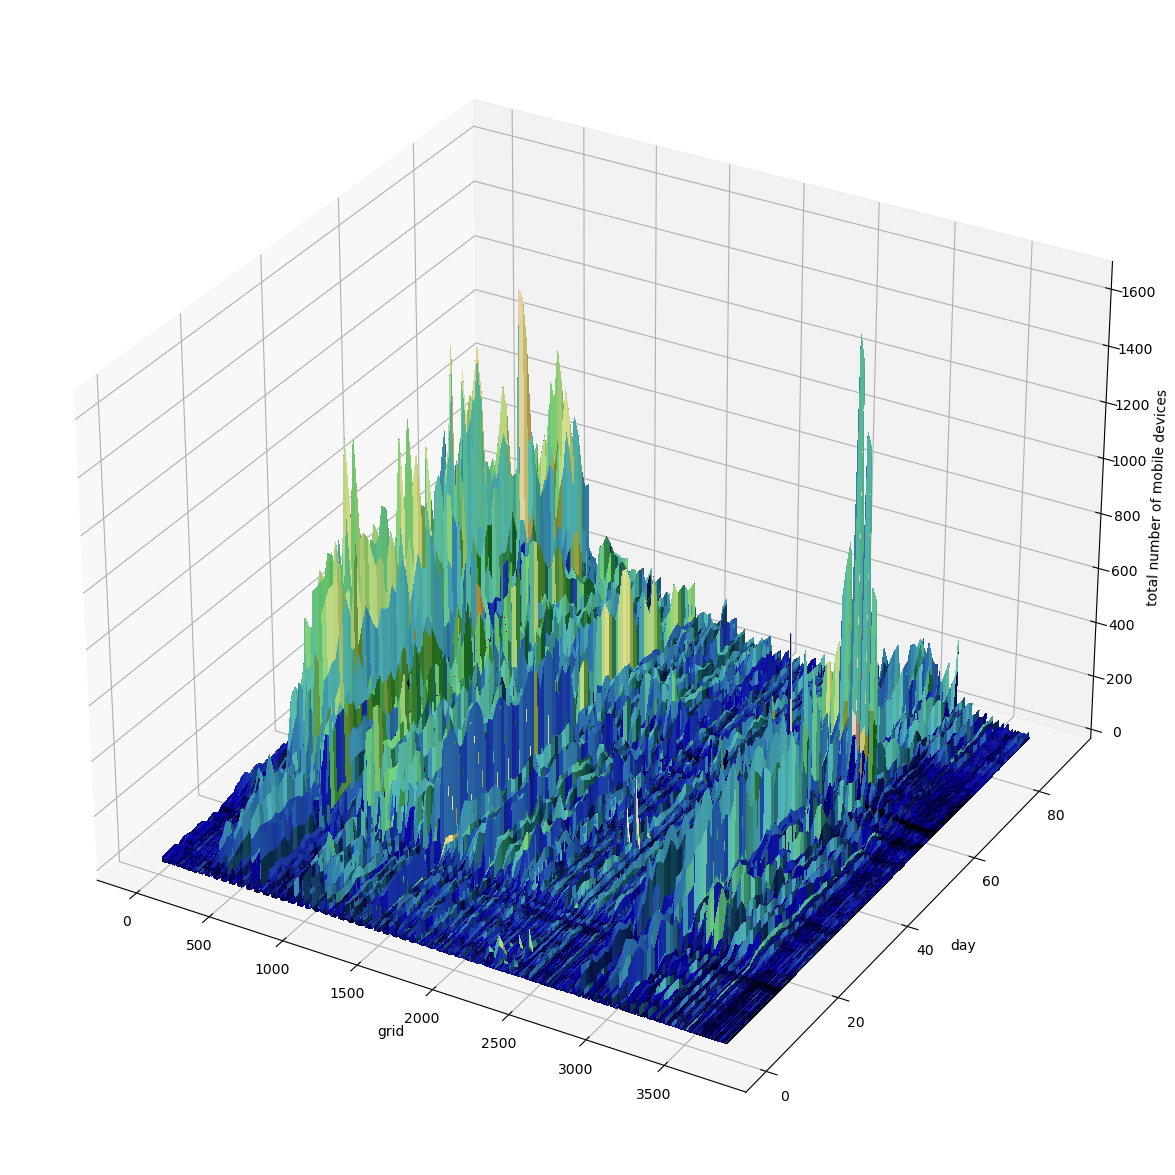

In [21]:
# 3D plot showing roaming data across the grids and day
z = totalusersroamingdata.mean(axis=2).transpose()

nrows, ncols = z.shape
x = np.linspace(0, ncols, ncols)
y = np.linspace(1, nrows, nrows)
x, y = np.meshgrid(x, y)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(15, 15))

surf = ax.plot_surface(x, y, z, label='density', rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

ax.set_xlabel('grid')
ax.set_ylabel('day')
ax.set_zlabel('total number of mobile devices')
#ax.set_zlim(0, 1000)
plt.show()

There are clearly tourist hotspots that can be distinguished from total roaming mobile devices - roaming traffic contributed a large amount to total number of mobile devices recorded within many grids.

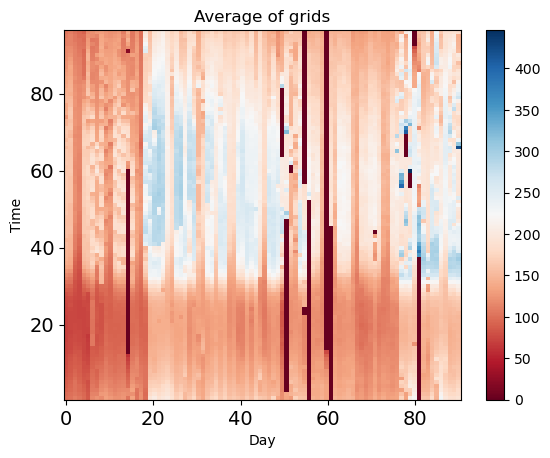

In [23]:
# different method for visualization of active mobile phones
# grid x day x time
# get average along the grids axis
z = totalusersdata.mean(axis=0).transpose()

# Get the shape of the 'z' array
nrows, ncols = z.shape
x = np.linspace(0, ncols, ncols)
y = np.linspace(1, nrows, nrows)
x, y = np.meshgrid(x, y)


plot = plt.pcolormesh(x, y, z, cmap='RdBu')
plt.colorbar(plot)
plt.title('Average of grids',fontsize=12)
plt.xlabel('Day',fontsize=10)
plt.ylabel('Time',fontsize=10)

plt.tick_params(axis='both',labelsize=14)

From 7am onwards on most days, we see the busiest time across the average grid.

### Traffic level map

<Axes: >

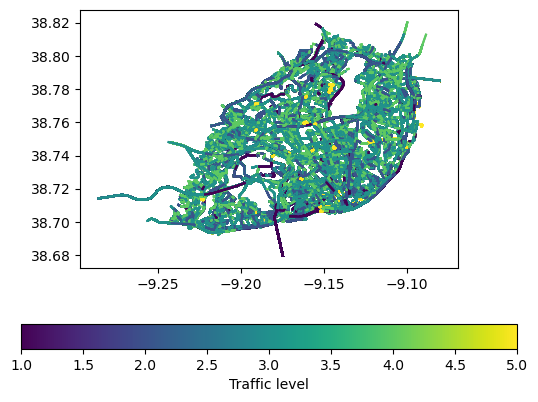

In [34]:
fig, ax = plt.subplots(1, 1)
traffic_df.plot(column='level', ax=ax, legend=True, 
              legend_kwds={'label': "Traffic level", 'orientation': "horizontal"})


We have plotted the traffic level across the main streets of Lisbon and classified the congestion level from 1-5 (1 being low and 5 being high). 

### Traffic Conditions

In [35]:
dfTransito = pd.read_csv('ficheiros_WDL/CONDICIONAMENTOS TRANSITO/CONDICIONAMENTOS TRANSITO_Set_Out_Nov2022.csv')
dfTransito.head()

creation_date  \
0  2022-09-01T08:26:21.000Z   
1  2022-09-01T08:38:55.000Z   
2  2022-09-01T08:49:59.000Z   
3  2022-09-01T08:53:46.000Z   
4  2022-09-01T08:54:54.000Z   

                                           entity_id  \
0      EMEL.condicionamentoTransito.COND-2022-5213-1   
1    EMEL.condicionamentoTransito.COND-2022-5214-A-1   
2      EMEL.condicionamentoTransito.COND-2022-5215-1   
3  EMEL.condicionamentoTransito.COND-2022-2383-PA-12   
4      EMEL.condicionamentoTransito.COND-2022-5216-1   

                                            position          impacto  \
0  {"type":"GeometryCollection","geometries":[{"c...  Pouco relevante   
1  {"type":"GeometryCollection","geometries":[{"c...  Pouco relevante   
2  {"type":"GeometryCollection","geometries":[{"c...        Relevante   
3  {"type":"GeometryCollection","geometries":[{"c...        Relevante   
4  {"type":"GeometryCollection","geometries":[{"c...  Pouco relevante   

                                           morada  \
0                         Rua João Saraiva, n.º 4   
1               Travessa Henrique Cardoso, n.º 77   
2          Rua Ernâni Lopes,  {ambos os sentidos}   
3  Rua Almeida Brandão, 1| Calçada da Estrela, 75   
4                        Av. da Ucrânia, Marvila    

                        motivo  \
0   OBRA - PASSEIO E ESTACION.   
1   OBRA - PASSEIO E ESTACION.   
2    RESERVA DE ESTACIONAMENTO   
3  BETONAGENS/CARGAS DESCARGAS   
4   OBRA - PASSEIO E ESTACION.   

                           periodos_condicionamentos  restricao_circulacao  
0  [{"end_date":"1664380800000","date_min":"2022-...  Estreitamento de via  
1  [{"end_date":"1664380800000","date_min":"2022-...  Estreitamento de via  
2  [{"end_date":"1662498000000","date_min":"2022-...        Estacionamento  
3  [{"end_date":"1665675000000","date_min":"2022-...  Estreitamento de via  
4  [{"end_date":"1664470800000","date_min":"2022-...  Estreitamento de via

In [36]:
# data cleaning and transforming coordinates
dfTransito['creation_date'] = pd.to_datetime(dfTransito['creation_date'], format="%Y-%m-%dT%H:%M:%S.%f", errors = 'coerce')
dfTransito['Time'] = pd.to_datetime(dfTransito['creation_date']).dt.time
dfTransito['Date'] = pd.to_datetime(dfTransito['creation_date']).dt.date
dfTransito.drop("creation_date", inplace=True, axis='columns')
dfTransito = dfTransito.sort_values(['Date', 'Time'])

dfTransito['geometry'] = dfTransito['position'].apply(get_coords)
dfTransito = dfTransito.drop(columns=['position'])
dfTransito['impacto']=dfTransito['impacto'].astype("string")

In [45]:
map1 = gpd.read_file('ficheiros_WDL/DISPOSITIVOS MOVEIS_TROÇOS DE VIA/DISPOSITIVOS MOVEIS_TROÇOS VIA_PONTOS/Entradas_Lx.shp')
map2 = gpd.read_file('ficheiros_WDL/DISPOSITIVOS MOVEIS_TROÇOS DE VIA/DISPOSITIVOS MOVEIS_TROÇOSVIA_POLIGONOS/eixos_polygon.shp')

crs = {'init':'EPSG:32629'}
geo_dfTransito = gpd.GeoDataFrame(dfTransito, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry='geometry') #specify the geometry list we created



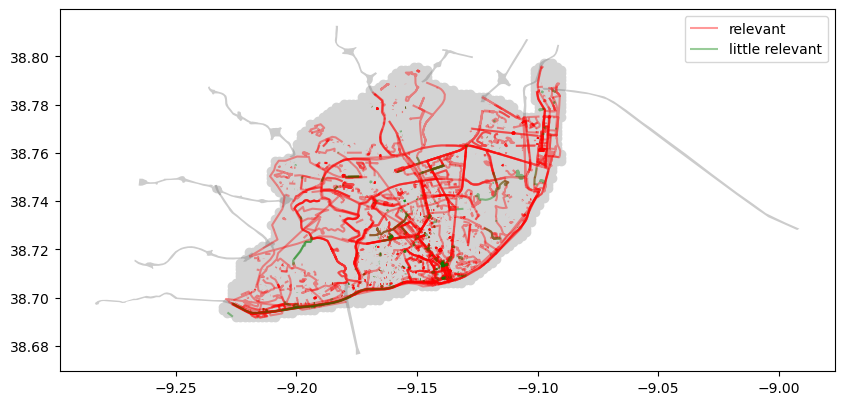

In [50]:
# plotting traffic instances classed as 'relevant' or 'little relevant'
centroids = gpd.GeoDataFrame(centroids)

fig, ax = plt.subplots(figsize = (10, 10))
centroids.plot(ax = ax,color ='lightgrey')
map2.plot(ax = ax, alpha = 0.4, color = "grey")
geo_dfTransito[geo_dfTransito['impacto'] == 'Relevante'].plot( 
            ax = ax,     
            markersize = 10, 
            alpha = 0.4,
            color = "red",  
            label = "relevant")
geo_dfTransito[geo_dfTransito['impacto'] == 'Pouco relevante'].plot( 
            ax = ax,           
            markersize = 10, 
            alpha = 0.4,
            color = "green", 
            label = "little relevant")
plt.legend(prop = {'size' : 10})

## Part 5: Forecasting with LSTM 


Most of forecasting algorithms like ARIMA need time series to be stationary. Stationary time series generally have very similar mean and variance values over time and do not contain seasonality and trend. 

We use LSTM as they are capable of learning nonlinearities and long-term dependencies in the sequence. Stationary time series is a less of concern for LSTM, however, we can still perform a transformation to make the data stationary in order to increase the model performance. 

* Note: This part requires tensorflow installed. 

In [18]:
import time
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping


An observation from each grid is recorded every 5 minutes. Therefore, we will have 12 observations for an hour and a single day will contain 288 (12x24) observations. 

In [4]:
dfAxis = pd.read_csv('ficheiros_WDL/DISPOSITIVOS MOVEIS_GRELHA E EIXOS/CML_DISPOSITIVOS MOVEIS_EIXOS_all.csv')
dfAxis['Datetime'] = pd.to_datetime(dfAxis['Datetime'])
dfAxis = dfAxis.sort_values(['Eixo','Datetime'])
dfAxis['Eixo'] = dfAxis['Eixo'].astype("category")
dfAxis.drop(["extract_year_2"], inplace=True, axis='columns')
dfAxis

Eixo                  Datetime  extract_month_3   
4                        A1 2022-08-31 23:00:00+00:00                8  \
19                       A1 2022-08-31 23:05:00+00:00                8   
25                       A1 2022-08-31 23:10:00+00:00                8   
40                       A1 2022-08-31 23:15:00+00:00                8   
49                       A1 2022-08-31 23:20:00+00:00                8   
...                     ...                       ...              ...   
272445  Ponte Vasco da Gama 2022-11-30 23:40:00+00:00               11   
272455  Ponte Vasco da Gama 2022-11-30 23:45:00+00:00               11   
272464  Ponte Vasco da Gama 2022-11-30 23:50:00+00:00               11   
272474  Ponte Vasco da Gama 2022-11-30 23:55:00+00:00               11   
272487  Ponte Vasco da Gama 2022-12-01 00:00:00+00:00               12   

        extract_day_4         C12         C13  
4                  31  102.760002   78.669998  
19                 31   80.790001   38.349998  
25                 31   55.480000   57.980000  
40                 31   40.639999   54.400002  
49                 31   88.269997  107.610001  
...               ...         ...         ...  
272445             30    5.610000    1.810000  
272455             30    4.780000    8.720000  
272464             30   42.889999   52.930000  
272474             30   54.889999   96.129997  
272487              1   64.180000   71.440002  

[272492 rows x 6 columns]

In [5]:
# checking data is clean
print ("Missing values : ", dfAxis.isnull().any())

Missing values :  Eixo               False
Datetime           False
extract_month_3    False
extract_day_4      False
C12                False
C13                False
dtype: bool


For simplicity we use the data from the axis ID 'A1'. We can remove the other IDs, build the forecasting model for 'A1'.

In [6]:
print(dfAxis['Datetime'][dfAxis['Eixo']=='A1'].nunique()/dfAxis.shape[0])

labelencoder = LabelEncoder()
dfAxis['Eixo'] = labelencoder.fit_transform(dfAxis['Eixo'])


0.09089808141156437


We use Granger’s causality test to identify the relationship between variables before building a model. The Granger Causality test is used to determine whether or not one time series is useful for forecasting another - in our case to see if the number of entrances is predictive of the future number of exits from axis.

In [7]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
gc_res1 = grangercausalitytests(dfAxis[['C12', 'C13']], maxlag=[480])



Granger Causality
number of lags (no zero) 480
ssr based F test:         F=48.1200 , p=0.0000  , df_denom=271051, df_num=480
ssr based chi2 test:   chi2=23179.5025, p=0.0000  , df=480
likelihood ratio test: chi2=22244.6310, p=0.0000  , df=480
parameter F test:         F=48.1200 , p=0.0000  , df_denom=271051, df_num=480


Since the p-value is less than .05, we can reject the null hypothesis of the test and we can say that knowing the number of entances is useful for predicting the future number of departures.

It is possible that reverse causation is happening, that is, the number of exits is predictive of the future number of entances.


In [8]:
gc_res2 = grangercausalitytests(dfAxis[['C13', 'C12']], maxlag=[480])


Granger Causality
number of lags (no zero) 480
ssr based F test:         F=28.7206 , p=0.0000  , df_denom=271051, df_num=480
ssr based chi2 test:   chi2=13834.7484, p=0.0000  , df=480
likelihood ratio test: chi2=13494.4172, p=0.0000  , df=480
parameter F test:         F=28.7206 , p=0.0000  , df_denom=271051, df_num=480


We will use the weekday as an additional feature and transform it as categorical variable.

We can also use additional information relevant to the forecasting problem, such as weekday, month, day of the month that are important to capture seasonal patterns. This can improve the model’s performance.

There are other additional information that we could add, like holidays, rain, events, etc.

The final version of our dataframe is like:

In [9]:
weekday = pd.get_dummies(dfAxis['Datetime'].dt.weekday)
weekday.columns = ['weekday_' + str(i) for i in range(weekday.shape[1])]

dataAxis = pd.concat([dfAxis, weekday], axis=1)
dataAxisA1 = dataAxis[dataAxis['Eixo']==0]
dataAxisA1

Eixo                  Datetime  extract_month_3  extract_day_4   
4          0 2022-08-31 23:00:00+00:00                8             31  \
19         0 2022-08-31 23:05:00+00:00                8             31   
25         0 2022-08-31 23:10:00+00:00                8             31   
40         0 2022-08-31 23:15:00+00:00                8             31   
49         0 2022-08-31 23:20:00+00:00                8             31   
...      ...                       ...              ...            ...   
272446     0 2022-11-30 23:40:00+00:00               11             30   
272451     0 2022-11-30 23:45:00+00:00               11             30   
272463     0 2022-11-30 23:50:00+00:00               11             30   
272477     0 2022-11-30 23:55:00+00:00               11             30   
272489     0 2022-12-01 00:00:00+00:00               12              1   

               C12         C13  weekday_0  weekday_1  weekday_2  weekday_3   
4       102.760002   78.669998      False      False       True      False  \
19       80.790001   38.349998      False      False       True      False   
25       55.480000   57.980000      False      False       True      False   
40       40.639999   54.400002      False      False       True      False   
49       88.269997  107.610001      False      False       True      False   
...            ...         ...        ...        ...        ...        ...   
272446   29.219999   58.150002      False      False       True      False   
272451  148.690002  414.309998      False      False       True      False   
272463  412.160004  295.299988      False      False       True      False   
272477  247.589996  412.420013      False      False       True      False   
272489  582.349976  541.549988      False      False      False       True   

        weekday_4  weekday_5  weekday_6  
4           False      False      False  
19          False      False      False  
25          False      False      False  
40          False      False      False  
49          False      False      False  
...           ...        ...        ...  
272446      False      False      False  
272451      False      False      False  
272463      False      False      False  
272477      False      False      False  
272489      False      False      False  

[24769 rows x 13 columns]

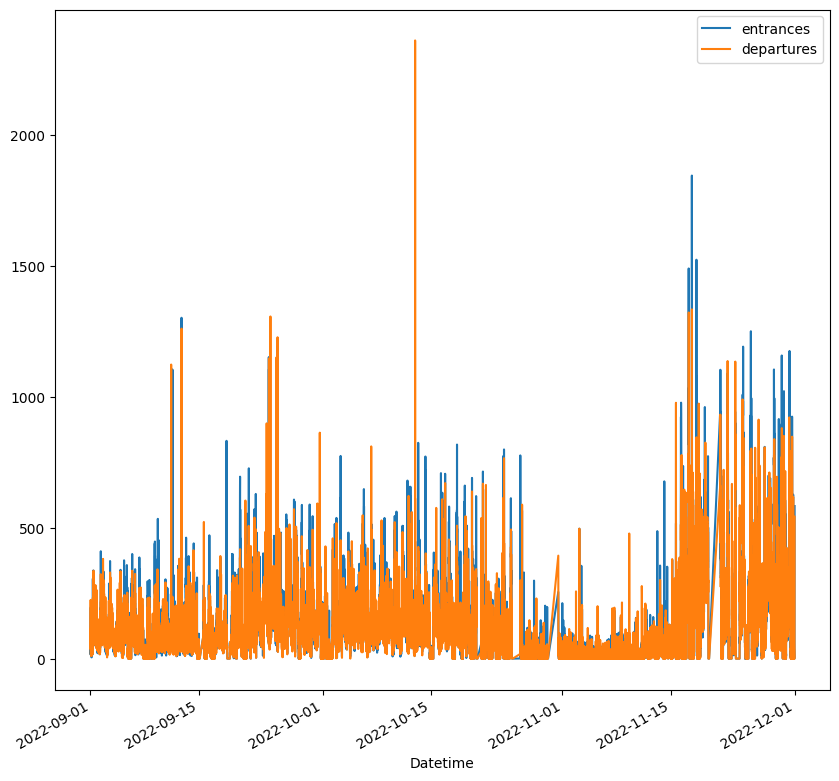

In [10]:
# plotting entrances and exits for road A1
features = dataAxisA1[['C12', 'C13', 'weekday_0','weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']]
features.index = dataAxisA1['Datetime']
dataset = features.values

fig, ax = plt.subplots(figsize = (10, 10))
features['C12'].plot(label = "entrances")
features['C13'].plot(label = "departures")
plt.legend(prop = {'size' : 10})


We use the first 200,000 rows of the data as the training dataset, and the remaining as the validation dataset.

It is also important to scale features before training a neural network. Standardization is a common scaling method - by subtracting the mean and dividing by the standard deviation of each feature.


In [11]:
train_idx = 20000

dataset[:,0] = (dataset[:,0]-dataset[:,0][:train_idx].mean(axis=0))/dataset[:,0][:train_idx].std(axis=0)
dataset[:,1] = (dataset[:,1]-dataset[:,1][:train_idx].mean(axis=0))/dataset[:,1][:train_idx].std(axis=0)


### Convolutional LSTM

In [12]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

SEED = 15
tf.random.set_seed(SEED)

past_history = 1440
future_target = 144
STEP = 12


# Data Load
BATCH_SIZE = 128
BUFFER_SIZE = 10000

# defining LSTM model
EVALUATION_INTERVAL = 200
EPOCHS = 4
PATIENCE = 5


In [13]:
def prepare_dataset(dataset, target, start_index, end_index, past_history,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + past_history
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-past_history, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data)[:,:,:,np.newaxis,np.newaxis], np.array(labels)[:,:,:,np.newaxis,np.newaxis]


In [14]:
dataset = np.asarray(dataset).astype(np.float32)

x_train, y_train = prepare_dataset(dataset[:,:10], dataset[:,:10], 0, train_idx, past_history,
                                                 future_target, STEP)
x_val, y_val = prepare_dataset(dataset[:,:10], dataset[:, :10], train_idx, None, past_history,
                                             future_target, STEP)



In [15]:

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [16]:
def build_model(input_timesteps, output_timesteps, num_links, num_inputs):    
    model = Sequential()
    model.add(BatchNormalization(name = 'batch_norm_0', input_shape = (input_timesteps, num_inputs, 1, 1)))
    model.add(ConvLSTM2D(name ='conv_lstm_1',
                         filters = 64, kernel_size = (10, 1),                       
                         padding = 'same', 
                         return_sequences = False))
    
    model.add(Dropout(0.30, name = 'dropout_1'))
    model.add(BatchNormalization(name = 'batch_norm_1'))
    
    model.add(Flatten())
    model.add(RepeatVector(output_timesteps))
    model.add(Reshape((output_timesteps, num_inputs, 1, 64)))

    model.add(ConvLSTM2D(name ='conv_lstm_2',
                         filters = 64, kernel_size = (5, 1), 
                         padding='same',
                         return_sequences = True))
    
    model.add(TimeDistributed(Dense(units=1, name = 'dense_1', activation = 'relu')))
    model.add(Dense(units=1, name = 'dense_2'))

    optimizer = tf.keras.optimizers.RMSprop(lr=0.003, clipvalue=1.0)
    model.compile(loss = "mse", optimizer = optimizer, metrics = ['mae', 'mse'])
    return model

In [19]:
EPOCHS = 30
steps_per_epoch = 300
validation_steps = 500

modelstart = time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience = PATIENCE, restore_best_weights=True)
model = build_model(x_train.shape[1], future_target, y_train.shape[2], x_train.shape[2])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_norm_0 (BatchNormaliz  (None, 120, 9, 1, 1)     4         
 ation)                                                          
                                                                 
 conv_lstm_1 (ConvLSTM2D)    (None, 9, 1, 64)          166656    
                                                                 
 dropout_1 (Dropout)         (None, 9, 1, 64)          0         
                                                                 
 batch_norm_1 (BatchNormaliz  (None, 9, 1, 64)         256       
 ation)                                                          
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 144, 576)         0

In [28]:
# Training model
history = model.fit(train_data,
                    epochs = EPOCHS,
                    validation_data=val_data,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    verbose=1,
                    callbacks=[early_stopping])
model.save('train_model_20231904.h5')

Epoch 1/30
350/350 [==============================] - 1259s 4s/step - loss: 0.6288 - mae: 0.5871 - mse: 0.6288 - val_loss: 0.5377 - val_mae: 0.5243 - val_mse: 0.5377
Epoch 2/30
350/350 [==============================] - 1298s 4s/step - loss: 0.5310 - mae: 0.4806 - mse: 0.5310 - val_loss: 0.4977 - val_mae: 0.4876 - val_mse: 0.4977
Epoch 3/30
350/350 [==============================] - 1264s 4s/step - loss: 0.8035 - mae: 0.5732 - mse: 0.8035 - val_loss: 0.4973 - val_mae: 0.4470 - val_mse: 0.4973
Epoch 4/30
350/350 [==============================] - 43938s 126s/step - loss: 0.8590 - mae: 0.5953 - mse: 0.8590 - val_loss: 0.4319 - val_mae: 0.4130 - val_mse: 0.4319
Epoch 5/30
350/350 [==============================] - 2791s 8s/step - loss: 0.4685 - mae: 0.4389 - mse: 0.4685 - val_loss: 0.4181 - val_mae: 0.4239 - val_mse: 0.4181
Epoch 6/30
350/350 [==============================] - 1301s 4s/step - loss: 0.4145 - mae: 0.3967 - mse: 0.4145 - val_loss: 0.3988 - val_mae: 0.3815 - val_mse: 0.3988
E

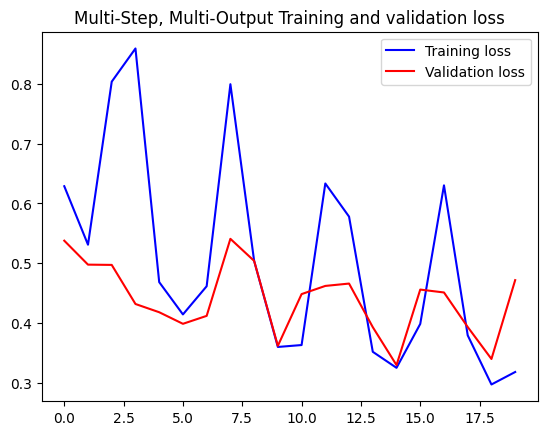

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Multi-Step, Multi-Output Training and validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 439ms/step


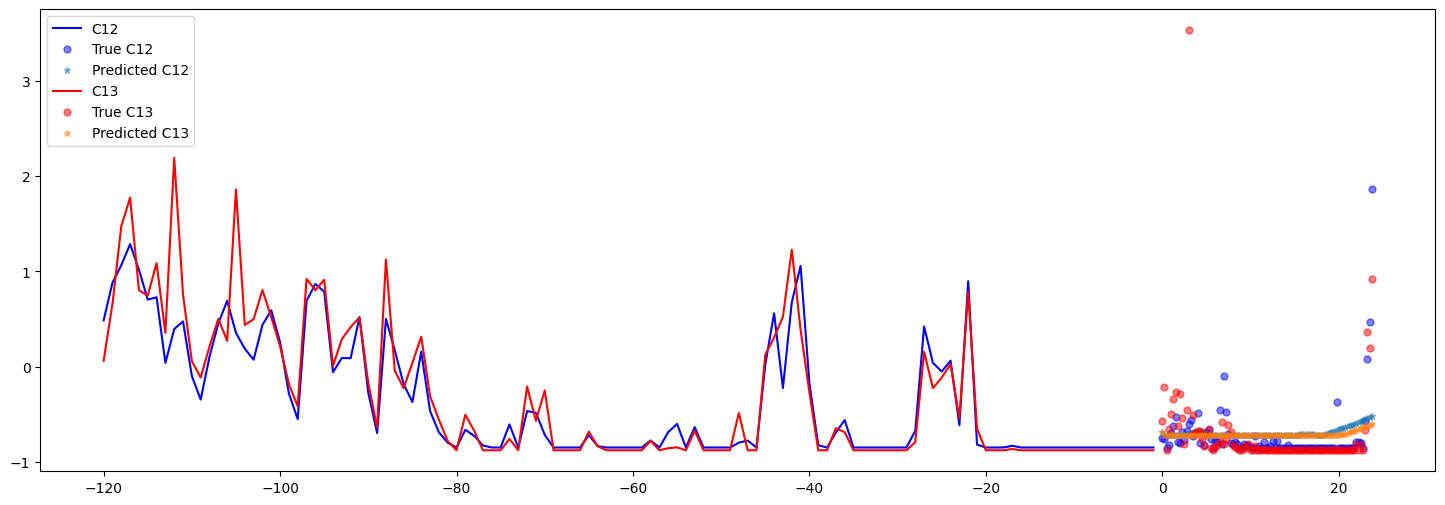

1/1 [==============================] - 0s 84ms/step


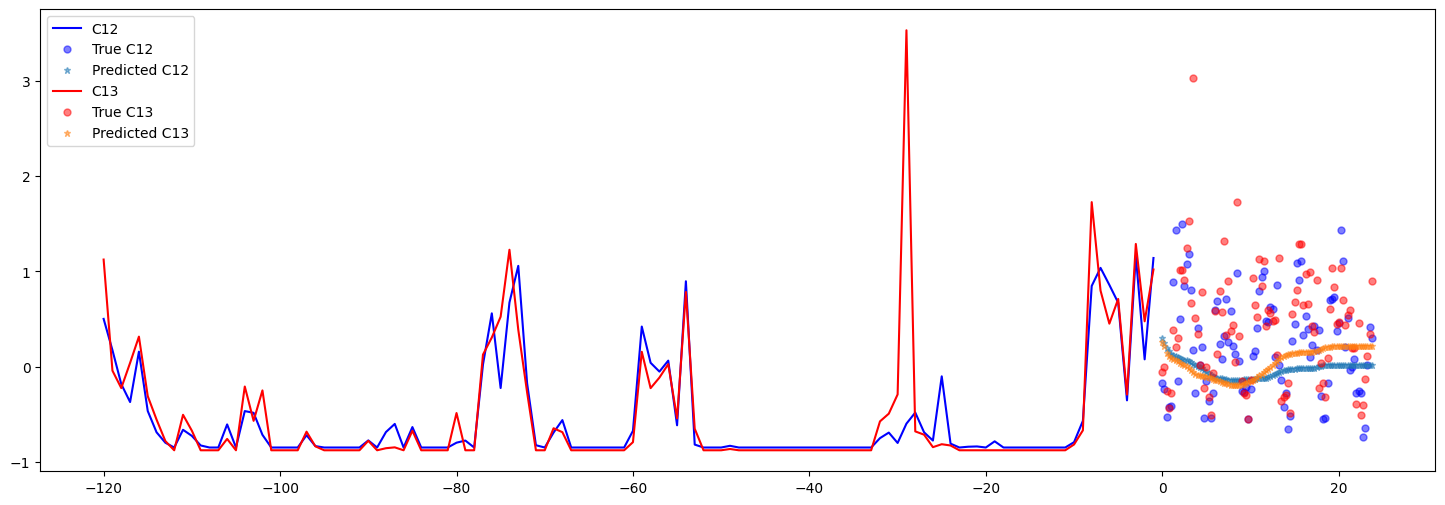

1/1 [==============================] - 0s 78ms/step


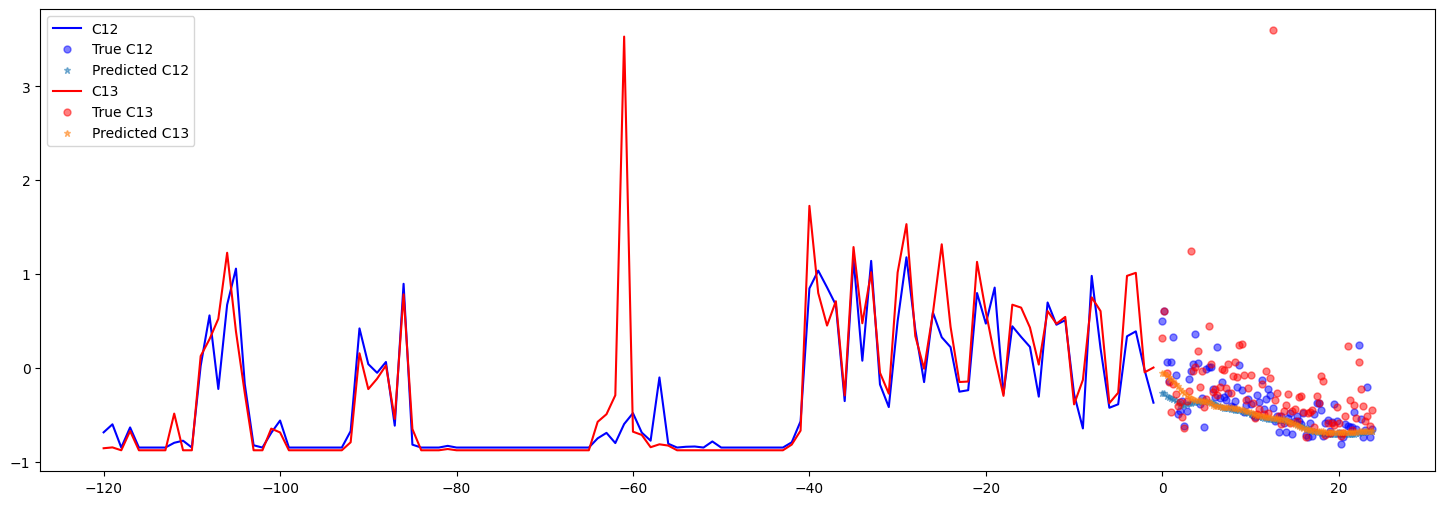

1/1 [==============================] - 0s 85ms/step


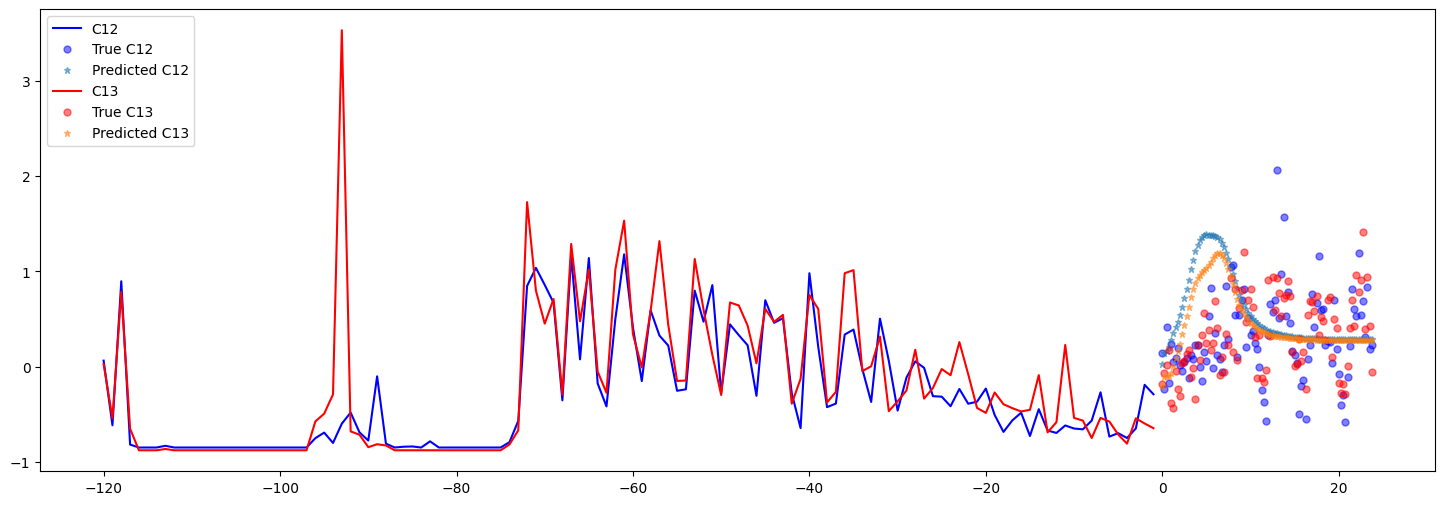

1/1 [==============================] - 0s 79ms/step


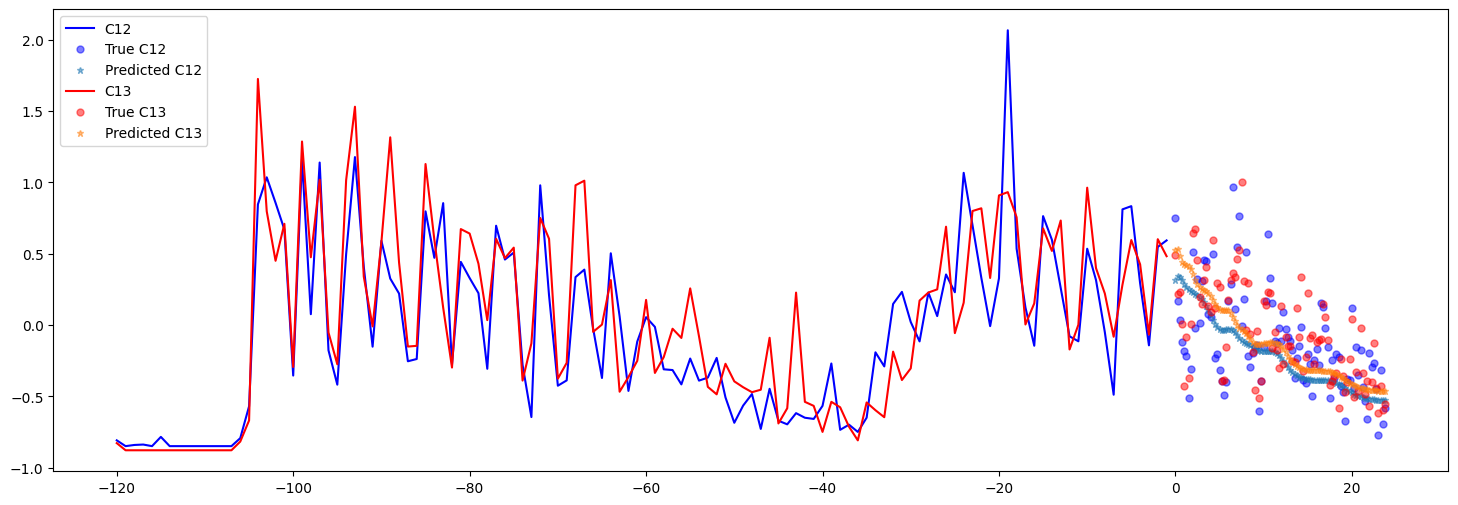

1/1 [==============================] - 0s 79ms/step


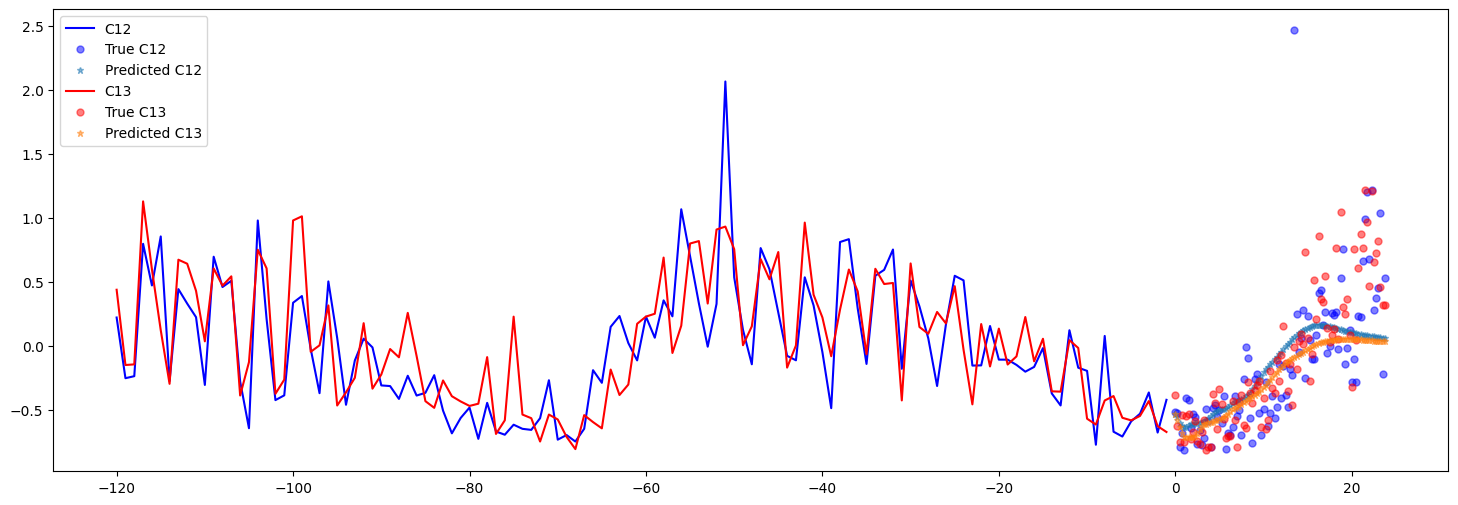

1/1 [==============================] - 0s 79ms/step


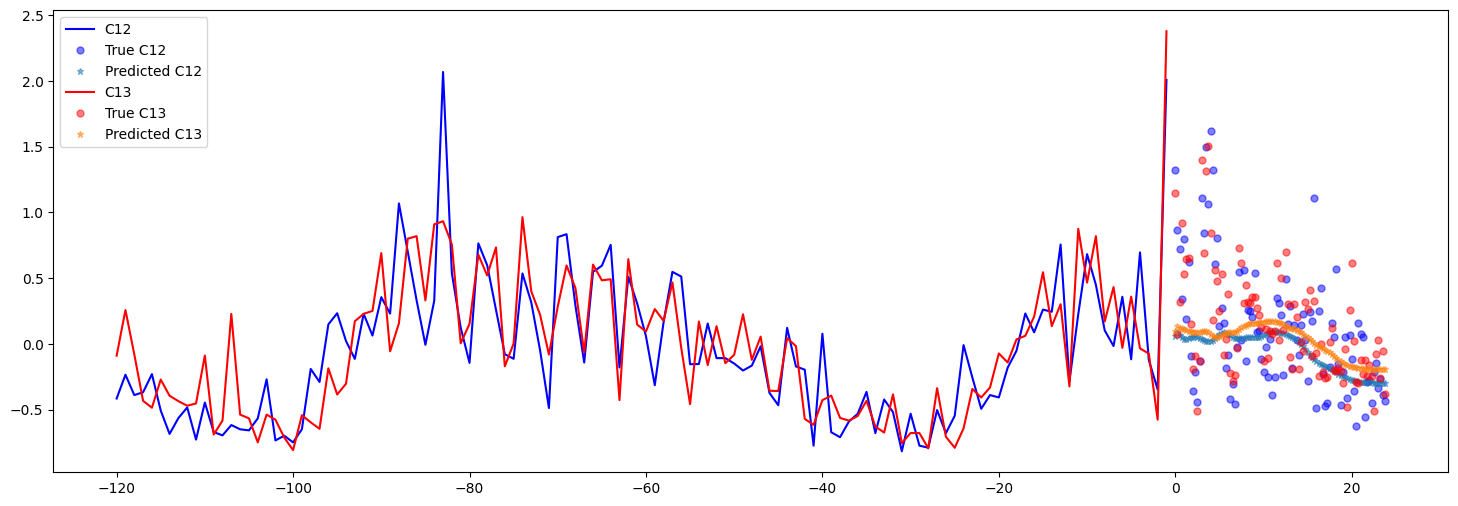

1/1 [==============================] - 0s 79ms/step


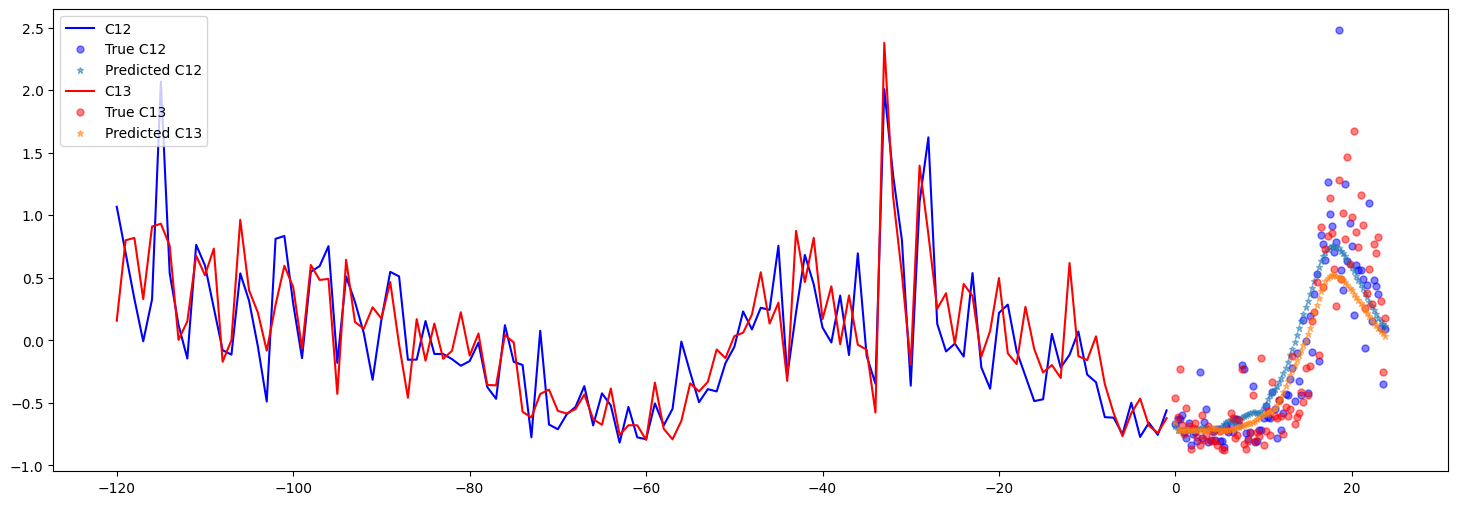

1/1 [==============================] - 0s 85ms/step


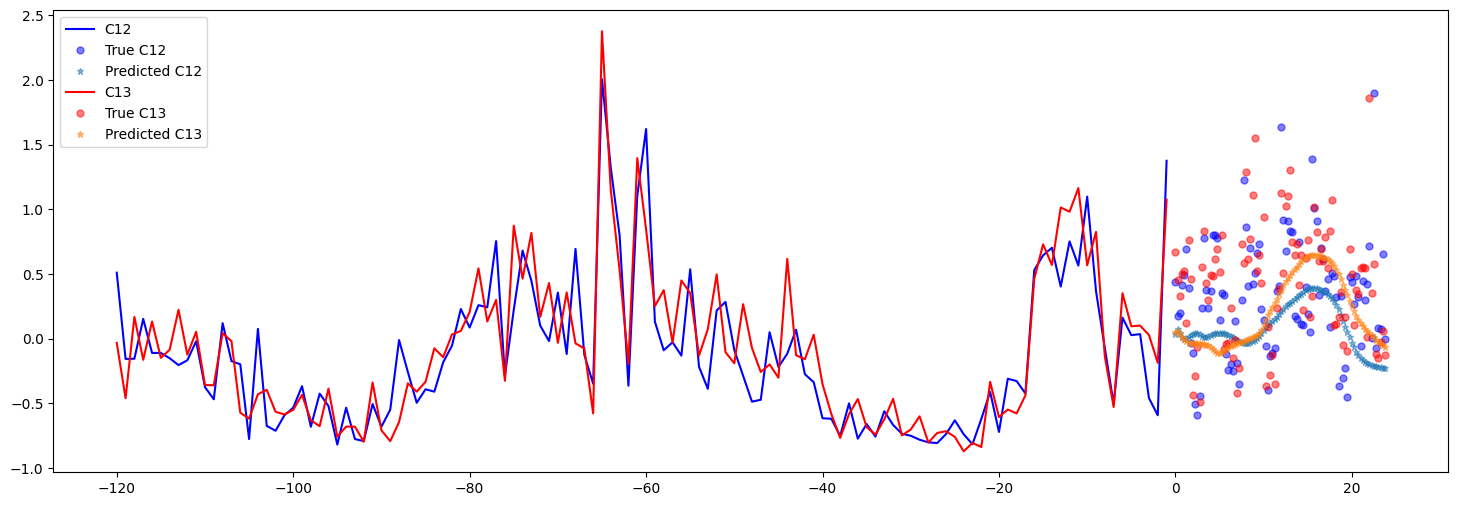

1/1 [==============================] - 0s 79ms/step


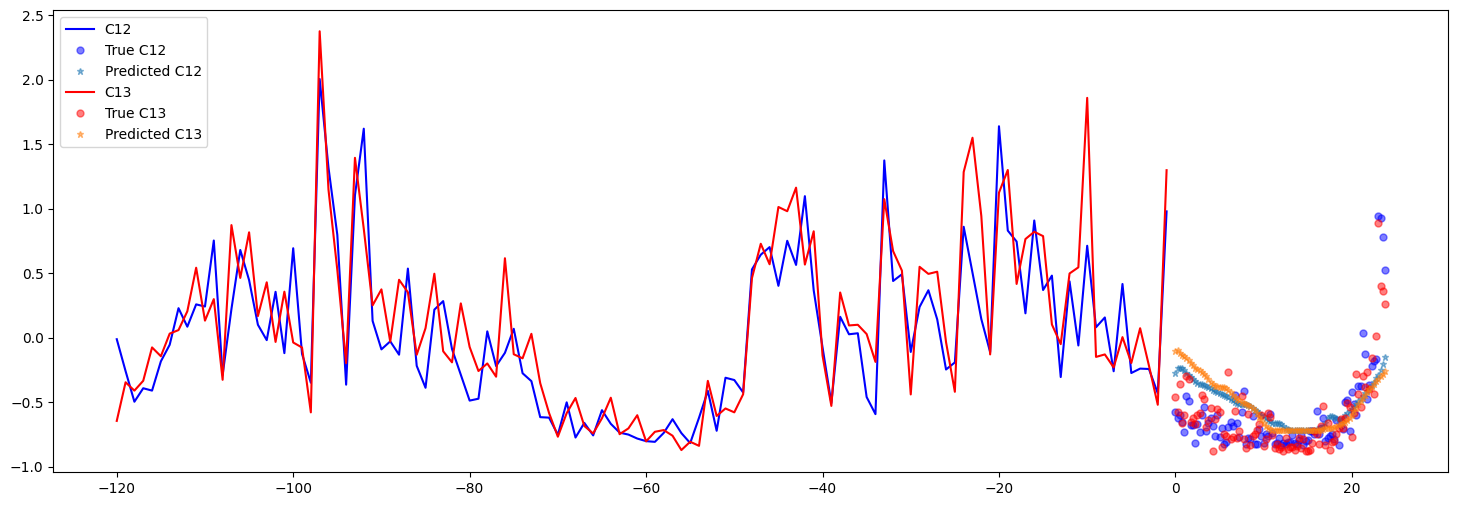

In [30]:
def plot_prediction(history, truth, prediction):
    plt.figure(figsize=(15, 6))
    num_in = list(range(-(len(history)), 0))
    num_out = len(truth)
    
    for i, (var, c) in enumerate(zip(features.columns[:2], ['b','r'])):
        plt.plot(num_in, np.array(history[:, i]), c, label=var)
        plt.plot(np.arange(num_out)/STEP, np.array(truth[:,i]), c+'o', markersize=5, alpha=0.5,
               label=f"True {var.title()}")
        if prediction.any():
            plt.plot(np.arange(num_out)/STEP, np.array(prediction[:,i]), '*', markersize=5, alpha=0.5,
                     label=f"Predicted {var.title()}")
    
    plt.legend(loc='upper left')
    plt.show()

for x, y in val_data.take(10):
    plot_prediction(np.squeeze(x[0]), np.squeeze(y[0]), np.squeeze(model.predict(x[0][np.newaxis,:,:,:,:])))

## Part 6: Summary

- To predict the number of entrances and exits from the city, we have built a forecasting model using LSTM. Similarly, using mobile terminal datasets and traffic info, we can build a forecasting model to predict the flow of users and traffic levels at a specific grid.

- To improve the model’s performance, we could add additional information, like working hours, holidays, rain, events, etc. Future work can be done by using SARIMA method for time series forecasting with data containing trends and seasonality. 